# ML Audio Classifier for Pico

## Install dependencies

### Python Libraries

In [ ]:
!pip install librosa matplotlib pandas "tensorflow==2.8.*" "tensorflow-io==0.24.*" "tensorflow-model-optimization==0.7.2"

!pip install git+https://github.com/ARM-software/CMSIS_5.git@5.8.0#egg=CMSISDSP\&subdirectory=CMSIS/DSP/PythonWrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.6/237.6 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 50.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uni

  Cloning https://github.com/ARM-software/CMSIS_5.git (to revision 5.8.0) to /tmp/pip-install-50_2fmpq/cmsisdsp_be5b29bbd5bb48378b6b3a72733d3c35
  Running command git clone --filter=blob:none --quiet https://github.com/ARM-software/CMSIS_5.git /tmp/pip-install-50_2fmpq/cmsisdsp_be5b29bbd5bb48378b6b3a72733d3c35
  Running command git checkout -q 649bd8aa41ed7d86b416c89cdb4b820b899a4cbc
  Resolved https://github.com/ARM-software/CMSIS_5.git to commit 649bd8aa41ed7d86b416c89cdb4b820b899a4cbc
  Preparing metadata (setup.py) ... done
  Created wheel for CMSISDSP: filename=CMSISDSP-1.0.0-cp310-cp310-linux_x86_64.whl size=1352941 sha256=54a3e79bafca9132b8ce112caf8c55f15a4bf2c72831efae4061da34bd473ea1
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_yigq2i/wheels/91/e0/e0/a9f82222f5d1eac8dca08f231ea3bffa47d79f51a2da4355f1
Successfully built CMSISDSP


### Command line tools for building applications on Raspberry Pi RP2040:

In [ ]:
import tensorflow as tf

tf.keras.utils.get_file('cmake-3.21.0-linux-x86_64.tar.gz',
                        'https://github.com/Kitware/CMake/releases/download/v3.21.0/cmake-3.21.0-linux-x86_64.tar.gz',
                        cache_dir='./',
                        cache_subdir='tools',
                        extract=True)

tf.keras.utils.get_file('gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2',
                        'https://developer.arm.com/-/media/Files/downloads/gnu-rm/10-2020q4/gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2',
                        cache_dir='./',
                        cache_subdir='tools',
                        extract=True)

156893184/156882554 [==============================] - 9s 0us/step


'./tools/gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2'

In [ ]:
!apt-get install -y xxd

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xxd is already the newest version (2:8.2.3995-1ubuntu2.15).
xxd set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import os

os.environ['PATH'] = f"{os.getcwd()}/tools/cmake-3.21.0-linux-x86_64/bin:{os.environ['PATH']}"
os.environ['PATH'] = f"{os.getcwd()}/tools/gcc-arm-none-eabi-10-2020-q4-major/bin:{os.environ['PATH']}"

### Raspberry Pi Pico SDK

Use `git` to get `v1.2.0` of the [Raspberry Pi Pico SDK](https://github.com/raspberrypi/pico-sdk)

In [ ]:
%%shell
git clone --branch 1.2.0 https://github.com/raspberrypi/pico-sdk.git
cd pico-sdk
git submodule init
git submodule update

Cloning into 'pico-sdk'...
remote: Enumerating objects: 7758, done.
remote: Counting objects: 100% (2412/2412), done.
remote: Compressing objects: 100% (470/470), done.
remote: Total 7758 (delta 1984), reused 2044 (delta 1912), pack-reused 5346
Receiving objects: 100% (7758/7758), 2.68 MiB | 17.59 MiB/s, done.
Resolving deltas: 100% (4259/4259), done.
Note: switching to 'bfcbefafc5d2a210551a4d9d80b4303d4ae0adf7'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Submodule 'tinyusb' (https://github.com/hathach/tinyusb.git) regis

Set the `PICO_SDK_PATH` environment variable to specify the location of the `pico-sdk`

In [ ]:
os.environ['PICO_SDK_PATH'] = f"{os.getcwd()}/pico-sdk"

Set board environment

In [ ]:
os.environ['PICO_BOARD'] = 'pico'

print(f"PICO_BOARD env. var. set to '{os.environ['PICO_BOARD']}'")

PICO_BOARD env. var. set to 'pico'


### Project Files

The source code for the inference application and Python utilities are from https://github.com/ArmDeveloperEcosystem/ml-audio-classifier-example-for-pico.git by Arm Developer Ecosystem:

In [ ]:
%%shell
git clone --recurse-submodules https://github.com/ArmDeveloperEcosystem/ml-audio-classifier-example-for-pico.git

Cloning into 'ml-audio-classifier-example-for-pico'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 131 (delta 43), reused 120 (delta 40), pack-reused 0
Receiving objects: 100% (131/131), 43.04 MiB | 35.86 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Submodule 'inference-app/lib/CMSIS_5' (https://github.com/ARM-software/CMSIS_5.git) registered for path 'inference-app/lib/CMSIS_5'
Submodule 'inference-app/lib/microphone-library-for-pico' (https://github.com/ArmDeveloperEcosystem/microphone-library-for-pico.git) registered for path 'inference-app/lib/microphone-library-for-pico'
Submodule 'inference-app/lib/pico-tflmicro' (https://github.com/raspberrypi/pico-tflmicro.git) registered for path 'inference-app/lib/pico-tflmicro'
Cloning into '/content/ml-audio-classifier-example-for-pico/inference-app/lib/CMSIS_5'...
remote: Enumerating objects: 44143, done.        
remote: Countin

In [ ]:
%%shell
ln -s ml-audio-classifier-example-for-pico/colab_utils colab_utils
ln -s ml-audio-classifier-example-for-pico/inference-app inference-app

## Baseline model

Start by training a generic sound classifier model with TensorFlow using the [ESC-50: Dataset for Environmental Sound Classification](https://github.com/karolpiczak/ESC-50), which contains 50 types of sounds; each sound category has 40 audio files that are 5 seconds each in length. Each audio file will be split into 1 second soundbites, and any soundbites that contain pure silence will be discarded.

### Prepare dataset

The ESC-50 dataset will be downloaded and extracted to the `datasets` folder using the [`tf.keras.utils.get_file(...)`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) function.

In [ ]:
import tensorflow as tf

tf.keras.utils.get_file('esc-50.zip',
                        'https://github.com/karoldvl/ESC-50/archive/master.zip',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

645701632/Unknown - 39s 0us/step

'./datasets/esc-50.zip'

#### Load dataset metadata

Use the [pandas](https://pandas.pydata.org/) library to read the `datasets/ESC-50-master/meta/esc50.csv` file which contains the metadata for the audio files in the ESC-50 dataset:

In [ ]:
import pandas as pd

esc50_csv = './datasets/ESC-50-master/meta/esc50.csv'
base_data_path = './datasets/ESC-50-master/audio/'

df = pd.read_csv(esc50_csv)
df.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

Then add new column with the `fullpath` of the wave files:

In [ ]:
from os import path

base_data_path = './datasets/ESC-50-master/audio/'

df['fullpath'] = df['filename'].map(lambda x: path.join(base_data_path, x))

df.head()

filename  fold  target        category  esc10  src_file take  \
0   1-100032-A-0.wav     1       0             dog   True    100032    A   
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A   
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A   
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B   
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A   

                                           fullpath  
0   ./datasets/ESC-50-master/audio/1-100032-A-0.wav  
1  ./datasets/ESC-50-master/audio/1-100038-A-14.wav  
2  ./datasets/ESC-50-master/audio/1-100210-A-36.wav  
3  ./datasets/ESC-50-master/audio/1-100210-B-36.wav  
4  ./datasets/ESC-50-master/audio/1-101296-A-19.wav

#### Load wave file data

Define a new function named `load_wav` to load audio samples from a wave file using TensorFlow's [`tf.io.read_file(...)`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) and[`tf.audio.decode_wav(...)`](https://www.tensorflow.org/api_docs/python/tf/audio/decode_wav) API's.

The [`tfio.audio.resample(...)`](https://www.tensorflow.org/io/api_docs/python/tfio/audio/resample) API will be used to resample the audio samples at the specified sampling rate.

[librosa](https://librosa.org/)'s [`load(...)`](https://librosa.org/doc/main/generated/librosa.load.html) API will be used as a fallback if TensorFlow is unable to decode the wave file.


In [ ]:
import tensorflow_io as tfio
import librosa

def load_wav(filename, desired_sample_rate, desired_channels):
  try:
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=desired_channels)
    wav = tf.squeeze(wav, axis=-1)
  except:
    # fallback to librosa if the wav file can be read with TF
    filename = tf.cast(filename, tf.string)
    wav, sample_rate = librosa.load(filename.numpy().decode('utf-8'), sr=None, mono=(desired_channels == 1))

  wav = tfio.audio.resample(wav, rate_in=tf.cast(sample_rate, dtype=tf.int64), rate_out=tf.cast(desired_sample_rate, dtype=tf.int64))

  return wav

Load the first wave file, which is a sound of a dog barking, from the pandas `DataFrame`, and plot it overtime using `matplotlib`. The [`IPython.display.Audio(...)`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#IPython.display.Audio) API can be used to playback the audio samples inside the notebook.




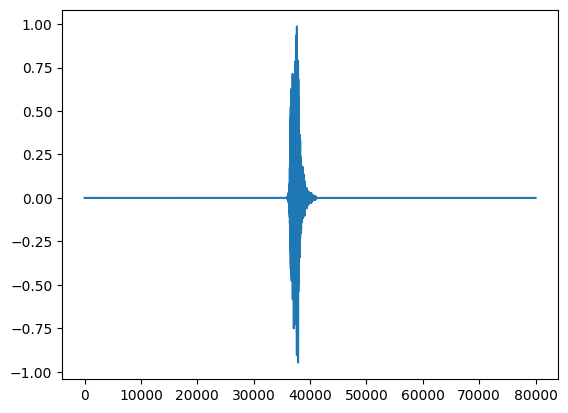

In [ ]:
import matplotlib.pyplot as plt
from IPython import display

sample_rate = 16000
channels = 1

test_wav_file_path = df['fullpath'][0]
test_wav_data = load_wav(test_wav_file_path, sample_rate, channels)

plt.plot(test_wav_data)
plt.show()

display.Audio(test_wav_data, rate=sample_rate)

Zoom in and only plot samples `32000` to `48000`, get a closer plot of the audio samples in the wave file in the 2 to 3 second span:

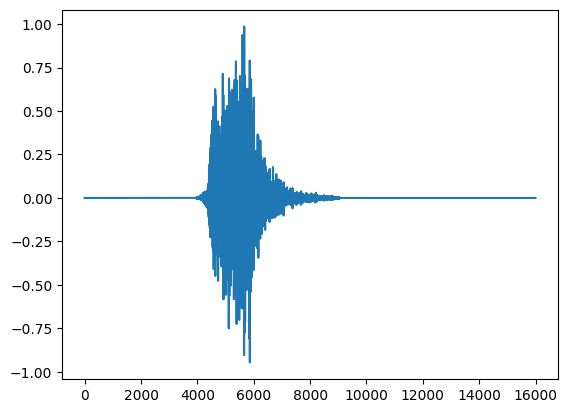

In [ ]:
_ = plt.plot(test_wav_data[32000:48000])

Use the [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) TensorFlow API to create a pipeline that loads all wave file data from the dataset.

In [ ]:
fullpaths = df['fullpath']
targets = df['target']
folds = df['fold']

fullpaths_ds = tf.data.Dataset.from_tensor_slices((fullpaths, targets, folds))
fullpaths_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Map each `fullpath` value to wave file samples:

In [ ]:
def load_wav_for_map(fullpath, label, fold):
  wav = tf.py_function(load_wav, [fullpath, sample_rate, channels], tf.float32)

  return wav, label, fold

wav_ds = fullpaths_ds.map(load_wav_for_map)
wav_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

#### Split Wave file data

Train the model on 1 secound soundbites, so must split up the 5 seconds of audio per item in the ESC-50 dataset to slices of 16000 samples. Also stride the original audio samples `4000` samples at a time, and filter out any sound chunks that contain pure silence.

In [ ]:
@tf.function
def split_wav(wav, width, stride):
  return tf.map_fn(fn=lambda t: wav[t * stride:t * stride + width], elems=tf.range((tf.shape(wav)[0] - width) // stride), fn_output_signature=tf.float32)

@tf.function
def wav_not_empty(wav):
  return tf.experimental.numpy.any(wav)

def split_wav_for_flat_map(wav, label, fold):
  wavs = split_wav(wav, width=16000, stride=4000)
  labels = tf.repeat(label, tf.shape(wavs)[0])
  folds = tf.repeat(fold, tf.shape(wavs)[0])
  for x in wavs:
    print(wavs)

  return tf.data.Dataset.from_tensor_slices((wavs, labels, folds))

split_wav_ds = wav_ds.flat_map(split_wav_for_flat_map)
split_wav_ds = split_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

Tensor("PartitionedCall:0", dtype=float32)


Plot the first 5 soundbites over time using `matplotlib`:

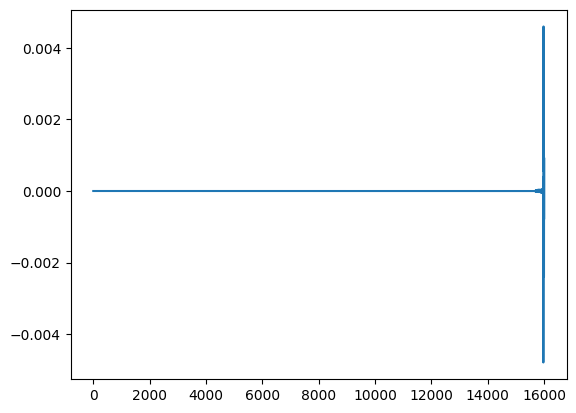

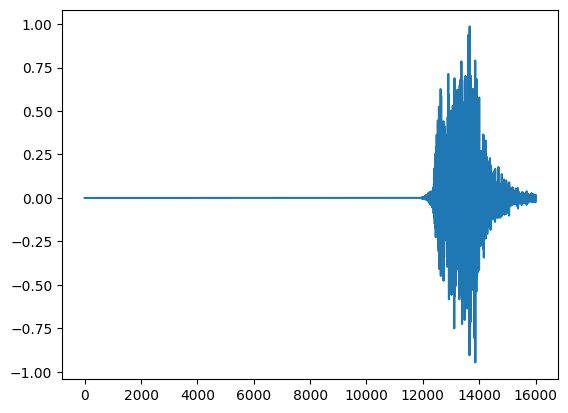

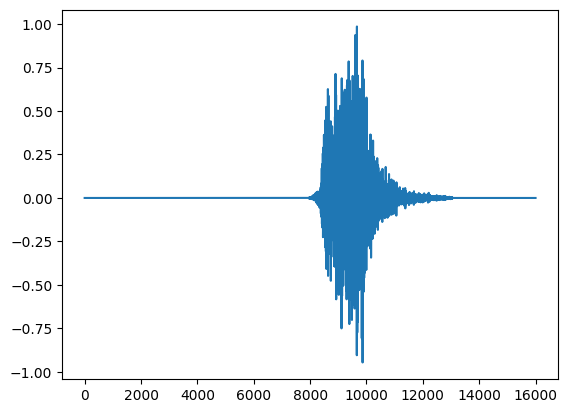

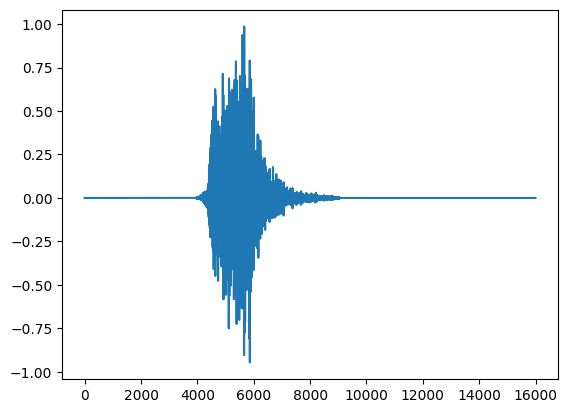

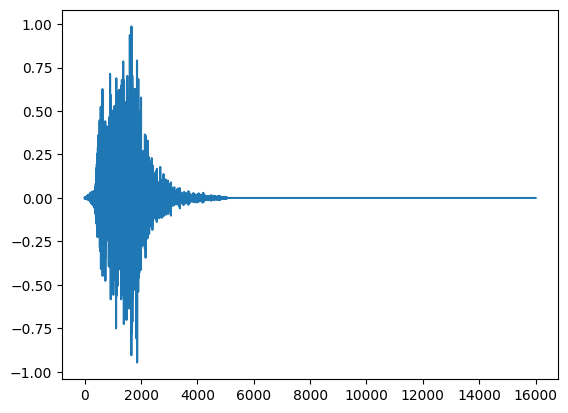

In [ ]:
for wav, _, _ in split_wav_ds.take(5):
  _ = plt.plot(wav)
  plt.show()

#### Create Spectrograms

Transform the audio data into an audio spectrogram representation.

The input audio signal will have a sampling rate of 16kHz, this means one second of audio will contain 16,000 samples. Using TensorFlow’s [`tf.signal.stft(...)`](https://www.tensorflow.org/api_docs/python/tf/signal/stft) function to transform a 1 second audio signal into a 2D tensor representation. Choose a frame length of 256 and a frame step of 128, so the output of this feature extraction stage will be a Tensor that has a shape of `(124, 129)`.


In [ ]:
@tf.function
def create_spectrogram(samples):
  return tf.abs(
      tf.signal.stft(samples, frame_length=256, frame_step=128)
  )

Take the same 2 - 3 second interval of the first dog barking wave file and create it's spectrogram representation:

In [ ]:
spectrogram = create_spectrogram(test_wav_data[32000:48000])

spectrogram.shape

TensorShape([124, 129])

Create `plot_spectrogram` function to plot the spectrogram representation using `matplotlib`:

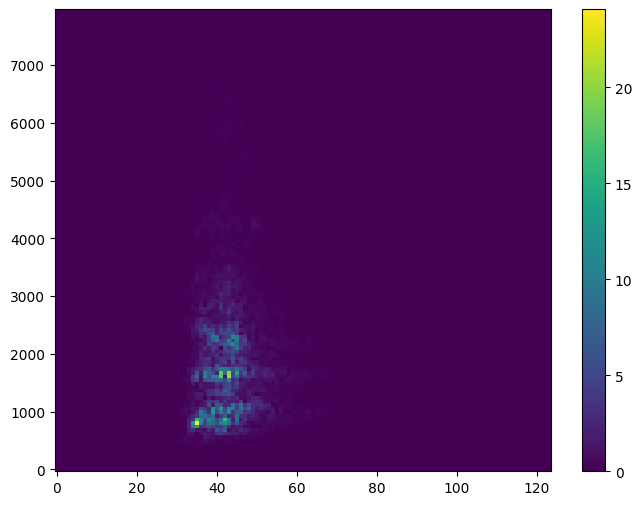

In [ ]:
import numpy as np

def plot_spectrogram(spectrogram, vmax=None):
  transposed_spectrogram = tf.transpose(spectrogram)

  fig = plt.figure(figsize=(8,6))
  height = transposed_spectrogram.shape[0]
  X = np.arange(transposed_spectrogram.shape[1])
  Y = np.arange(height * int(sample_rate / 256), step=int(sample_rate / 256))

  im = plt.pcolormesh(X, Y, tf.transpose(spectrogram), vmax=vmax)

  fig.colorbar(im)
  plt.show()


plot_spectrogram(spectrogram)

Map each split wave item to a spectrogram:

In [ ]:
def create_spectrogram_for_map(samples, label, fold):
  return create_spectrogram(samples), label, fold

spectrograms_ds = split_wav_ds.map(create_spectrogram_for_map)
spectrograms_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Plot the first 5 spectrograms in the dataset:

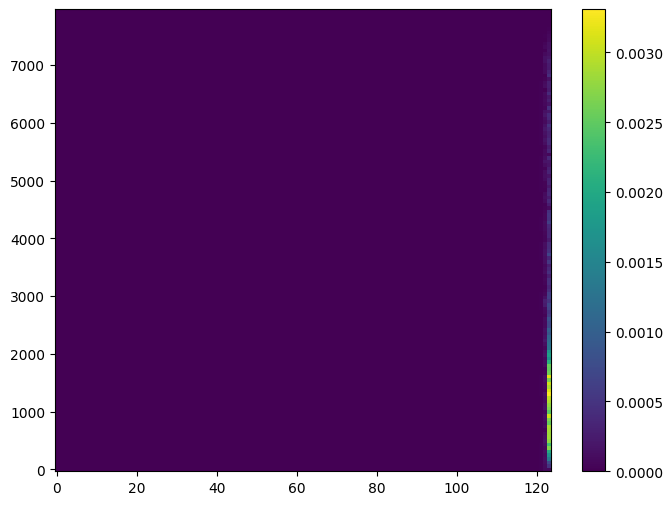

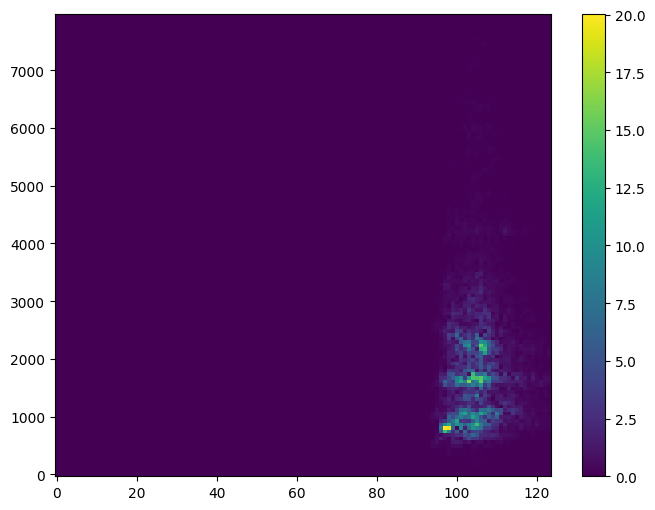

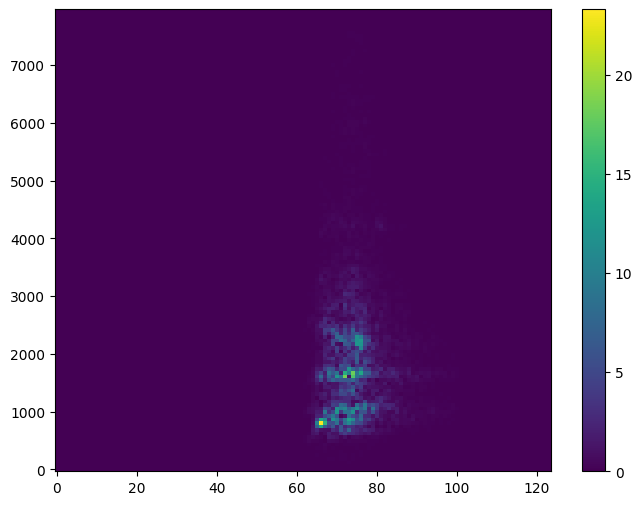

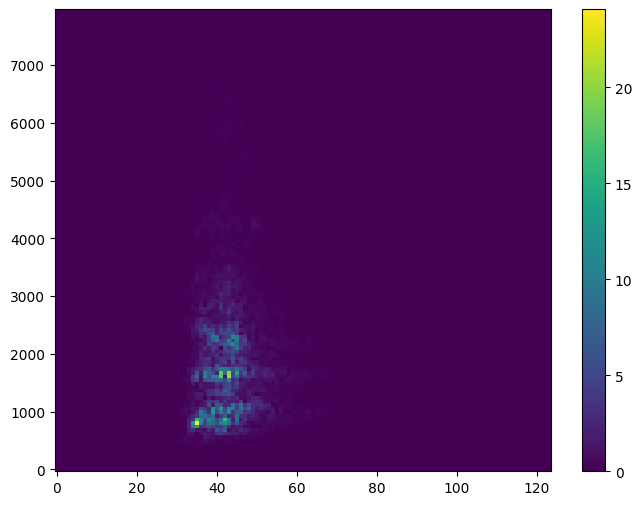

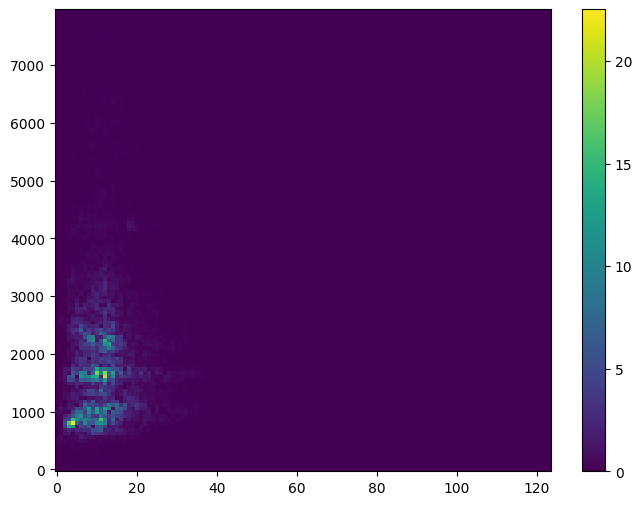

In [ ]:
for s, _, _ in spectrograms_ds.take(5):
  plot_spectrogram(s)

### Split Dataset

Split the dataset up in three parts: training, validation, and test before start training the ML classifier model.

Use the technique in TensorFlow's [Transfer learning with YAMNet for environmental sound classification](https://www.tensorflow.org/tutorials/audio/transfer_learning_audio#split_the_data) guide, and use the `fold` column of the ESC-50 dataset to determine the split.

Before splitting the dataset, set a random seed for reproducibility:

In [ ]:
import numpy as np
import tensorflow as tf

# Set seed for experiment reproducibility
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

Entries with a `fold` value of less than 4 will used for training, the ones with a `value` will be used for validation, and the remaining items with be used for testing.

The `fold` column will be removed as it is no longer needed, and the dimensions of the spectrogram shape will be expanded from `(124, 129)` to `(124, 129, 1)`. The training items will also be shuffled.

In [ ]:
cached_ds = spectrograms_ds.cache()

train_ds = cached_ds.filter(lambda spectrogram, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda spectrogram, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda spectrogram, label, fold: fold > 4)

# remove the folds column as it's no longer needed
remove_fold_column = lambda spectrogram, label, fold: (tf.expand_dims(spectrogram, axis=-1), label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000, seed=random_seed).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

### Train Model

Now that the features are extracted from the audio signal, create a model using TensorFlow’s Keras  API. The model will consist of 8 layers:

 1. An input layer.
 1. A preprocessing layer, that will resize the input tensor from 124x129x1 to 32x32x1.
 1. A normalization layer, that will scale the input values between -1 and 1
 1. A 2D convolution layer with: 8 filters, a kernel size of 8x8, and stride of 2x2, and ReLU activation function.
 1. A 2D max pooling layer with size of 2x2
 1. A flatten layer to flatten the 2D data to 1D
 1. A dropout layer, that will help reduce overfitting during training
 1. A dense layer with 50 outputs and a softmax activation function, which outputs the likelihood of the sound category (between 0 and 1).


Before build the model using [Tensflow's Keras API's](https://www.tensorflow.org/api_docs/python/tf/keras), create normalization layer and feed in all the spectrogram dataset items.

In [ ]:
for spectrogram, _, _ in cached_ds.take(1):
    input_shape = tf.expand_dims(spectrogram, axis=-1).shape
    print('Input shape:', input_shape)

norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
norm_layer.adapt(cached_ds.map(lambda x, y, z: tf.reshape(x, input_shape)))

Input shape: (124, 129, 1)


Define a sequential 8 layer model as described above:

In [ ]:
baseline_model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=input_shape),
  tf.keras.layers.experimental.preprocessing.Resizing(32, 32, interpolation="nearest"),
  norm_layer,
  tf.keras.layers.Conv2D(8, kernel_size=(8,8), strides=(2, 2), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(50, activation='softmax')
])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 8)         520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dropout (Dropout)           (None, 288)               0

Compile the model with `accuracy` metrics, an Adam optimizer and a sparse categorical crossentropy loss function. As well as define early stopping and dynamic learning rate scheduler callbacks for training.

In [ ]:
METRICS = [
      "accuracy",
]

baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=METRICS,
)

def scheduler(epoch, lr):
  if epoch < 100:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=25),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

Train the model:

In [ ]:
EPOCHS = 250
history = baseline_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
)

Epoch 1/250
557/557 [==============================] - 4s 6ms/step - loss: 3.4001 - accuracy: 0.1328 - val_loss: 3.4907 - val_accuracy: 0.0980 - lr: 0.0010
Epoch 2/250
557/557 [==============================] - 3s 5ms/step - loss: 2.9099 - accuracy: 0.2217 - val_loss: 3.3978 - val_accuracy: 0.1483 - lr: 0.0010
Epoch 3/250
557/557 [==============================] - 3s 5ms/step - loss: 2.7134 - accuracy: 0.2688 - val_loss: 3.3644 - val_accuracy: 0.1567 - lr: 0.0010
Epoch 4/250
557/557 [==============================] - 3s 5ms/step - loss: 2.5943 - accuracy: 0.3004 - val_loss: 3.3129 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 5/250
557/557 [==============================] - 3s 5ms/step - loss: 2.4865 - accuracy: 0.3267 - val_loss: 3.2327 - val_accuracy: 0.2120 - lr: 0.0010
Epoch 6/250
557/557 [==============================] - 3s 5ms/step - loss: 2.4166 - accuracy: 0.3488 - val_loss: 3.2235 - val_accuracy: 0.2130 - lr: 0.0010
Epoch 7/250
557/557 [==============================] - 3s 5ms/st

Evaluate the loss and accuracy of the test dataset:

In [ ]:
baseline_model.evaluate(test_ds)

187/187 [==============================] - 1s 2ms/step - loss: 3.8743 - accuracy: 0.2546


[3.874340772628784, 0.25464901328086853]

Save the model:

In [ ]:
baseline_model.save("baseline_model")

Create a zip file of the saved model, for download purposes:

In [ ]:
!zip -r baseline_model.zip baseline_model

  adding: baseline_model/ (stored 0%)
  adding: baseline_model/saved_model.pb (deflated 86%)
  adding: baseline_model/assets/ (stored 0%)
  adding: baseline_model/keras_metadata.pb (deflated 87%)
  adding: baseline_model/variables/ (stored 0%)
  adding: baseline_model/variables/variables.index (deflated 60%)
  adding: baseline_model/variables/variables.data-00000-of-00001 (deflated 9%)


## Transfer Learning

Now use Transfer Learning and change the classification head of the model to train a binary classification model for dog bark sounds.

Assume the first few layers have learned quite general feature extraction techniques that can be applied to all similar tasks, so can freeze all these layers. The classifier layer will need to be trained based on the new classes.

Break the process into two steps:
Freeze the "backbone" of the model and train the head with a fairly high learning rate, slowly reduce the learning rate.
Unfreeze the "backbone" and fine-tune the model with a low learning rate.


### Dataset

Collected 10 dog bark clips from [freesound.org](https://freesound.org/) and [BigSoundBank.com](https://bigsoundbank.com/).  Background noise clips from the [SpeechCommands](https://www.tensorflow.org/datasets/catalog/speech_commands) dataset, will be used for non-dog bark sounds.

### Download datasets

In [ ]:
tf.keras.utils.get_file('dog_barks.tar.gz',
                        'https://github.com/seaweed2018/180DA-WarmUp/raw/main/ml-audio-classifier-example-for-pico-dog_barks_2.tar.gz',
                        cache_subdir='datasets',
                        extract=True)

38658048/38643945 [==============================] - 0s 0us/step


'./datasets/dog_barks.tar.gz'

In [ ]:
# Since only need the files in the _background_noise_ folder of the dataset
# use the curl command to download the archive file and then manually extract
# using the tar command, instead of using tf.keras.utils.get_file(...)
# in Python

!mkdir -p datasets/speech_commands
!curl -L -o datasets/speech_commands_v0.02.tar.gz http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!tar --wildcards --directory datasets/speech_commands -xzvf datasets/speech_commands_v0.02.tar.gz './_background_noise_/*'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2316M  100 2316M    0     0   187M      0  0:00:12  0:00:12 --:--:--  186M
./_background_noise_/README.md
./_background_noise_/pink_noise.wav
./_background_noise_/running_tap.wav
./_background_noise_/exercise_bike.wav
./_background_noise_/doing_the_dishes.wav
./_background_noise_/dude_miaowing.wav
./_background_noise_/white_noise.wav


### Load dataset

Load the dog bark files and background noise files separately. Map the `label` and `fold` values manually.

In [ ]:
dog_bark_files_ds = tf.data.Dataset.list_files("datasets/ml-audio-classifier-example-for-pico-dog_barks_2/*.wav", shuffle=False)
dog_bark_files_ds = dog_bark_files_ds.map(lambda x: (x, 1, -1))

In [ ]:
background_noise_files_ds = tf.data.Dataset.list_files("datasets/speech_commands/_background_noise_/*.wav", shuffle=False)
background_noise_files_ds = background_noise_files_ds.map(lambda x: (x, 0, -1))

In [ ]:
dog_bark_wav_ds = dog_bark_files_ds.map(load_wav_for_map)
dog_bark_wav_ds = dog_bark_wav_ds.cache()

background_noise_wav_ds = background_noise_files_ds.map(load_wav_for_map)
background_noise_wav_ds = background_noise_wav_ds.cache()

Plot and listen to the first dog bark file:

Do the same for the first background noise file:

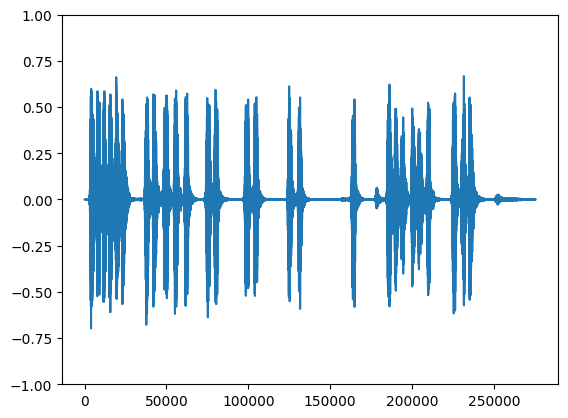

In [ ]:
for wav_data, _, _ in dog_bark_wav_ds.take(1):
  #print(tf.size(wav_data))
  plt.plot(wav_data)
  plt.ylim([-1, 1])
  plt.show()

  display.display(display.Audio(wav_data, rate=sample_rate))

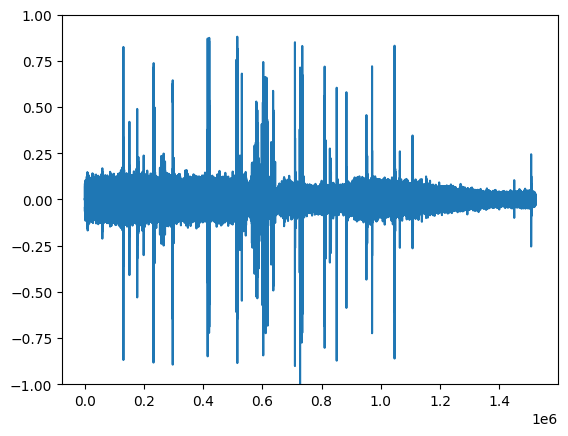

In [ ]:
for wav_data, _, _ in background_noise_wav_ds.take(1):
  plt.plot(wav_data)
  plt.ylim([-1, 1])
  plt.show()

  display.display(display.Audio(wav_data, rate=sample_rate))

Split the audio samples into 1 second soundbites:

In [ ]:
split_dog_bark_wav_ds = dog_bark_wav_ds.flat_map(split_wav_for_flat_map)
#print(list(split_dog_bark_wav_ds.as_numpy_iterator()))
#for x in split_dog_bark_wav_ds:
#  x = 0
split_dog_bark_wav_ds = split_dog_bark_wav_ds.filter(lambda x, y, z: wav_not_empty(x))
#print(split_dog_bark_wav_ds)

split_background_noise_wav_ds = background_noise_wav_ds.flat_map(split_wav_for_flat_map)
split_background_noise_wav_ds = split_background_noise_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

Tensor("PartitionedCall:0", dtype=float32)
Tensor("PartitionedCall:0", dtype=float32)


CMSIS-DSP based operations:

 1. Manually creating a Hanning Window of length 256 using the Hanning Window formula along with CMSIS-DSP’s `arm_cos_f32` API.
 1. Creating a CMSIS-DSP `arm_rfft_instance_q15` instance and initializing it using CMSIS-DSP’s `arm_rfft_init_q15` API.
 1. Looping through the audio data 256 samples at a time, with a stride of 128 (this matches the parameters passed into the TF sft API)
  1. Multiplying the 256 samples by the Hanning Window, using CMSIS-DSP’s `arm_mult_q15` API
  1. Calculating the FFT of the output of the previous step, using CMSIS-DSP’s `arm_rfft_q15` API
  1. Calculating the magnitude of the previous step, using CMSIS-DSP’s `arm_cmplx_mag_q15` API
 1. Each audio soundbites’s FFT magnitude represents the one column of the spectrogram.
 1. Since the baseline model expects a floating-point input, instead of the 16-bit quantized value, the CMSIS-DSP `arm_q15_to_float` API can be used to convert the spectrogram data from a 16-bit fixed-point value to a floating-point value for training.

In [ ]:
import cmsisdsp
from numpy import pi as PI

window_size = 256
step_size = 128

hanning_window_f32 = np.zeros(window_size)
for i in range(window_size):
  hanning_window_f32[i] = 0.5 * (1 - cmsisdsp.arm_cos_f32(2 * PI * i / window_size ))

hanning_window_q15 = cmsisdsp.arm_float_to_q15(hanning_window_f32)

rfftq15 = cmsisdsp.arm_rfft_instance_q15()
status = cmsisdsp.arm_rfft_init_q15(rfftq15, window_size, 0, 1)

def get_arm_spectrogram(waveform):

  num_frames = int(1 + (len(waveform) - window_size) // step_size)
  fft_size = int(window_size // 2 + 1)

  # Convert the audio to q15
  waveform_q15 = cmsisdsp.arm_float_to_q15(waveform)

  # Create empty spectrogram array
  spectrogram_q15 = np.empty((num_frames, fft_size), dtype = np.int16)

  start_index = 0

  for index in range(num_frames):
    # Take the window from the waveform.
    window = waveform_q15[start_index:start_index + window_size]

    # Apply the Hanning Window.
    window = cmsisdsp.arm_mult_q15(window, hanning_window_q15)

    # Calculate the FFT, shift by 7 according to docs
    window = cmsisdsp.arm_rfft_q15(rfftq15, window)

    # Take the absolute value of the FFT and add to the Spectrogram.
    spectrogram_q15[index] = cmsisdsp.arm_cmplx_mag_q15(window)[:fft_size]

    # Increase the start index of the window by the overlap amount.
    start_index += step_size

  # Convert to numpy output ready for keras
  return cmsisdsp.arm_q15_to_float(spectrogram_q15).reshape(num_frames,fft_size) * 512

Create a spectrogram representation for all of the dog bark soundbites, and plot the first spectrogram.

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>


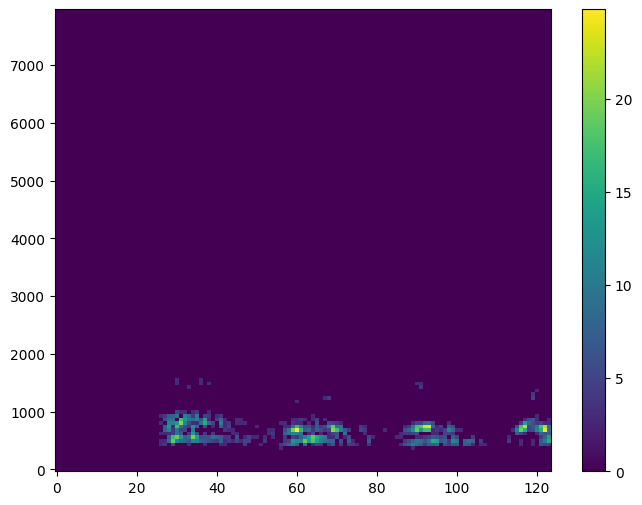

In [ ]:
@tf.function
def create_arm_spectrogram_for_map(wav, label, fold):
  spectrogram = tf.py_function(get_arm_spectrogram, [wav], tf.float32)

  return spectrogram, label, fold

dog_bark_spectrograms_ds = split_dog_bark_wav_ds.map(create_arm_spectrogram_for_map)
print(type(split_dog_bark_wav_ds))
dog_bark_spectrograms_ds = dog_bark_spectrograms_ds.cache()

for spectrogram, _, _ in dog_bark_spectrograms_ds.take(1):
  plot_spectrogram(spectrogram)


Do the same for the background noise soundbites:

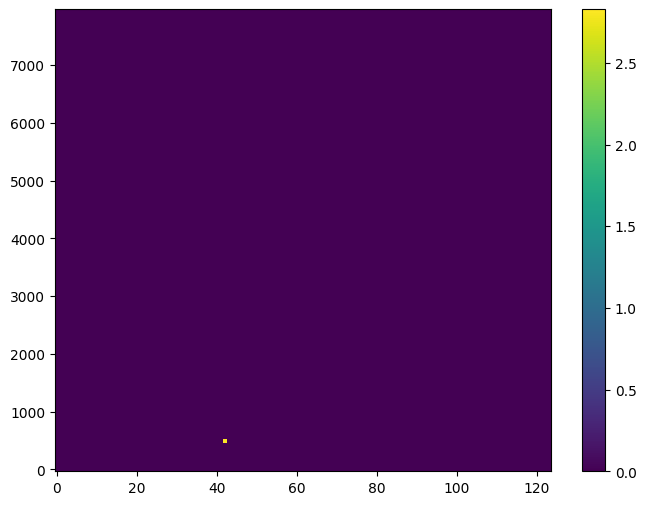

In [ ]:
background_noise_spectrograms_ds = split_background_noise_wav_ds.map(create_arm_spectrogram_for_map)
background_noise_spectrograms_ds = background_noise_spectrograms_ds.cache()

for spectrogram, _, _ in background_noise_spectrograms_ds.take(1):
  plot_spectrogram(spectrogram)

Calculate the lengths of each dataset to see how balanced they are:

In [ ]:
def calculate_ds_len(ds):
   count = 0
   for _, _, _ in ds:
     count += 1

   return count

num_dog_bark_spectrograms = calculate_ds_len(dog_bark_spectrograms_ds)
num_background_noise_spectrograms = calculate_ds_len(background_noise_spectrograms_ds)

print(f"num_dog_bark_spectrograms = {num_dog_bark_spectrograms}")
print(f"num_background_noise_spectrograms = {num_background_noise_spectrograms}")

num_dog_bark_spectrograms = 994
num_background_noise_spectrograms = 1572


### Data Augmentation

Use three techniques to increase the size of a dataset:

 * adding white noise to the audio samples
 * adding random silence to the audio
 * mixing two audio samples together

Plot the time representation of the first dog bark soundbite over time along with it's spectrogram representation, so can compare against the augmented versions.


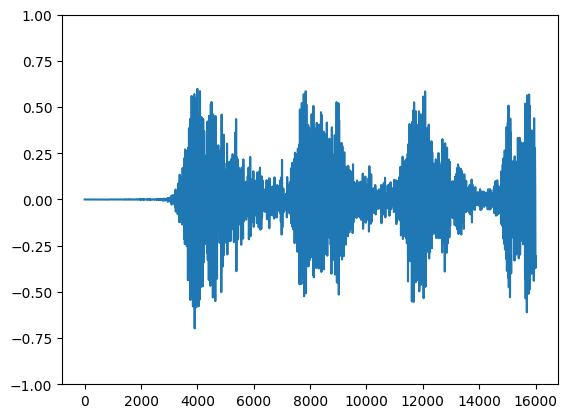

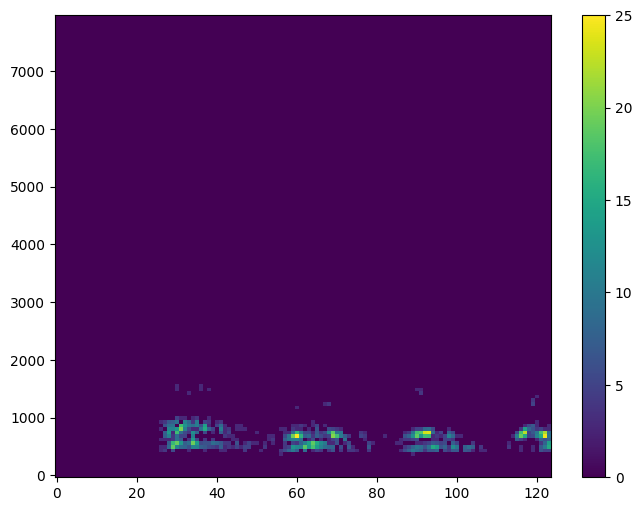

In [ ]:
for wav, _, _ in split_dog_bark_wav_ds.take(1):
  test_dog_bark_wav = wav

plt.plot(test_dog_bark_wav)
plt.ylim([-1, 1])
plt.show()

plot_spectrogram(get_arm_spectrogram(test_dog_bark_wav), vmax=25)

display.display(display.Audio(test_dog_bark_wav, rate=sample_rate))

#### White Noise

TensorFlow's [`tf.random.uniform(...)`](https://www.tensorflow.org/api_docs/python/tf/random/uniform) API can be used generate a Tensor of equal shape to the original audio. This Tensor can then be multiplied by a random scalar, and then added to the original audio samples. The [`tf.clip_by_value(...)`](https://www.tensorflow.org/api_docs/python/tf/clip_by_value) API will also be used to ensure the audio remains in the range of -1.0 to 1.0.

In [ ]:
def add_white_noise(audio):
  #generate noise and the scalar multiplier
  noise = tf.random.uniform(shape=tf.shape(audio), minval=-1, maxval=1)
  noise_scalar = tf.random.uniform(shape=[1], minval=0, maxval=0.2)

  # add them to the original audio
  audio_with_noise = audio + (noise * noise_scalar)

  # final clip the values to ensure they are still between -1 and 1
  audio_with_noise = tf.clip_by_value(audio_with_noise, clip_value_min=-1, clip_value_max=1)

  return audio_with_noise

Apply the white noise to the dog bark sound and then plot it to compare.

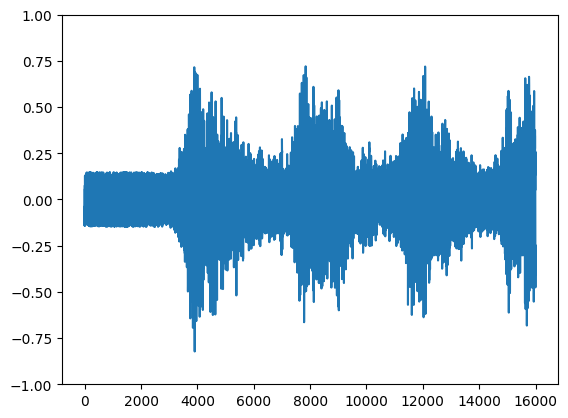

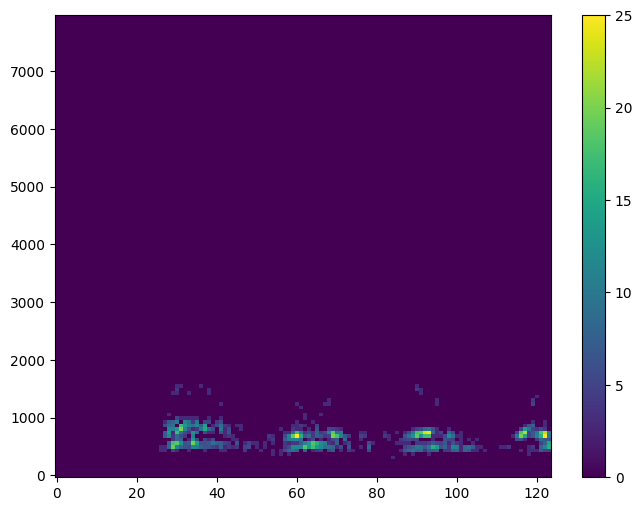

In [ ]:
test_dog_bark_with_white_noise_wav = add_white_noise(test_dog_bark_wav)

plt.plot(test_dog_bark_with_white_noise_wav)
plt.ylim([-1, 1])
plt.show()

plot_spectrogram(get_arm_spectrogram(test_dog_bark_with_white_noise_wav), vmax=25)

display.display(display.Audio(test_dog_bark_with_white_noise_wav, rate=sample_rate))

#### Random Silence

TensorFlow's [`tf.random.categorical(...)`](https://www.tensorflow.org/api_docs/python/tf/random/categorical) API can be used generate a Tensor of equal shape to the original audio containing mask of `True` or `False`. This mask can then be casted to a float type of 1.0 or 0.0, so that it can be multiplied by the original audio single to create random periods of silence.

In [ ]:
def add_random_silence(audio):
  audio_mask = tf.random.categorical(tf.math.log([[0.2, 0.8]]), num_samples=tf.shape(audio)[0])
  audio_mask = tf.cast(audio_mask, dtype=tf.float32)
  audio_mask = tf.squeeze(audio_mask, axis=0)

  # multiply the audio input by the mask
  augmented_audio = audio * audio_mask

  return augmented_audio

Apply the random silence to the dog bark sound and then plot it to compare.

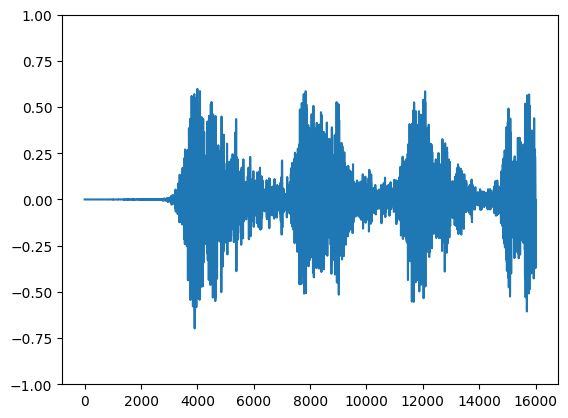

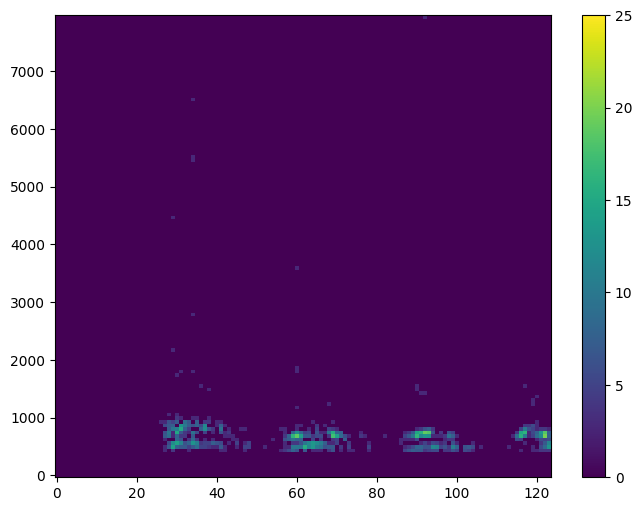

In [ ]:
test_dog_bark_with_random_silence_wav = add_random_silence(test_dog_bark_wav)

plt.plot(test_dog_bark_with_random_silence_wav)
plt.ylim([-1, 1])
plt.show()

plot_spectrogram(get_arm_spectrogram(test_dog_bark_with_random_silence_wav), vmax=25)

display.display(display.Audio(test_dog_bark_with_random_silence_wav, rate=sample_rate))

#### Audio Mixups

Combine a dog bark soundbite with a background noise soundbite to create a mixed up version of the two.

Select the first background noise soundbite.

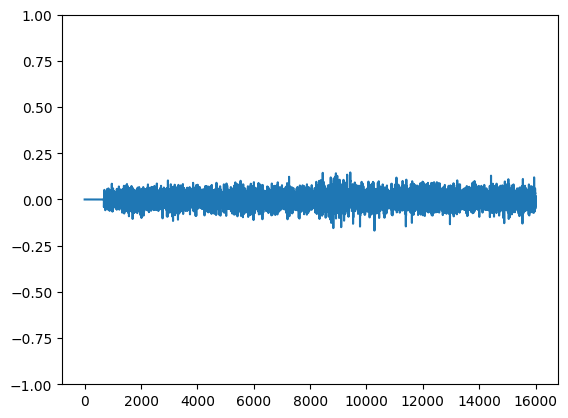

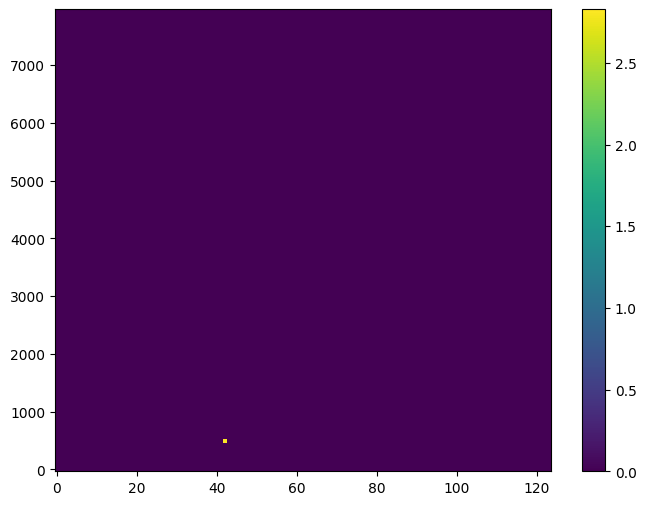

In [ ]:
for wav, _, _ in split_background_noise_wav_ds.take(1):
  test_background_noise_wav = wav

plt.plot(test_background_noise_wav)
plt.ylim([-1, 1])
plt.show()

plot_spectrogram(get_arm_spectrogram(test_background_noise_wav))

display.display(display.Audio(test_background_noise_wav, rate=sample_rate))

Multiply the background noise soundbite with a random scalar before adding it to the original dog bark soundbite. Then ensure the mixed up value is between the range of -1.0 and 1.0.

In [ ]:
def add_audio_mixup(audio, mixup_audio):
  # randomly generate a scalar
  noise_scalar = tf.random.uniform(shape=[1], minval=0, maxval=1)

  # add the background noise to the audio
  augmented_audio = audio + (mixup_audio * noise_scalar)

  #final clip the values so they are stil between -1 and 1
  augmented_audio = tf.clip_by_value(augmented_audio, clip_value_min=-1, clip_value_max=1)

  return augmented_audio

Apply the audio mixup to the dog bark sound and then plot it to compare.

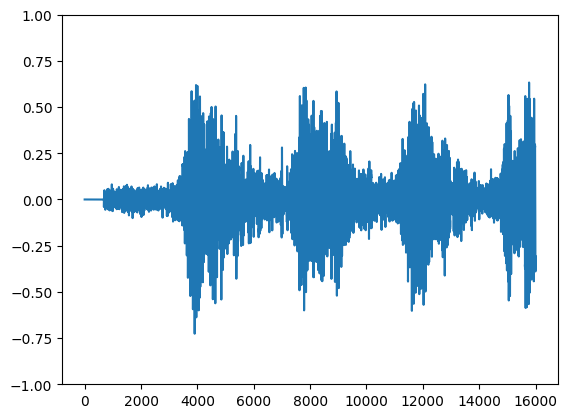

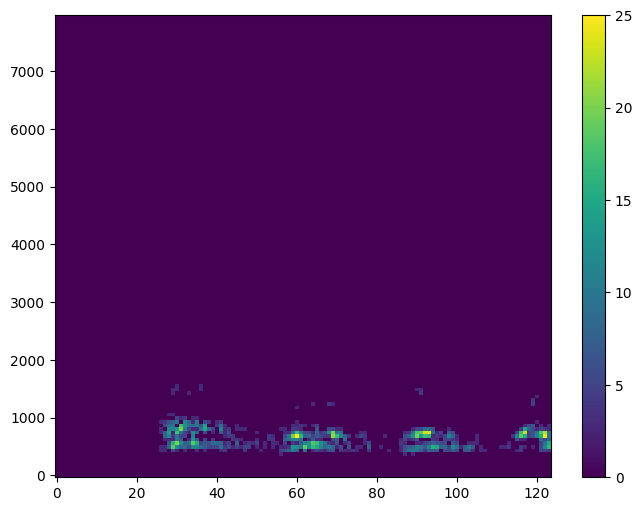

In [ ]:
test_dog_bark_with_mixup_wav = add_audio_mixup(test_dog_bark_wav, test_background_noise_wav)

plt.plot(test_dog_bark_with_mixup_wav)
plt.ylim([-1, 1])
plt.show()

plot_spectrogram(get_arm_spectrogram(test_dog_bark_with_mixup_wav), vmax=25)

display.display(display.Audio(test_dog_bark_with_mixup_wav, rate=sample_rate))

### Create Augmented Dataset

Combine all three augmententation techniques to balance the dataset.

Calculate how many augmented files need to generate:

In [ ]:
num_augmented_dog_bark_spectrograms = num_background_noise_spectrograms - num_dog_bark_spectrograms

print(f'num_augmented_dog_bark_spectrograms = {num_augmented_dog_bark_spectrograms}')

num_augmented_dog_bark_spectrograms = 578


Then can divide by 3, to calculate how many augmented soundbites per technique to generate:

In [ ]:
num_white_noise_dog_bark_spectrograms = num_augmented_dog_bark_spectrograms // 3
num_random_silence_dog_bark_spectrograms = num_augmented_dog_bark_spectrograms // 3
num_audio_mixup_dog_bark_spectrograms = num_augmented_dog_bark_spectrograms // 3

print(f'num_white_noise_dog_bark_spectrograms = {num_white_noise_dog_bark_spectrograms}')
print(f'num_random_silence_dog_bark_spectrograms = {num_random_silence_dog_bark_spectrograms}')
print(f'num_audio_mixup_dog_bark_spectrograms = {num_audio_mixup_dog_bark_spectrograms}')

num_white_noise_dog_bark_spectrograms = 192
num_random_silence_dog_bark_spectrograms = 192
num_audio_mixup_dog_bark_spectrograms = 192


Select and shuffle the number of soundbites required:

In [ ]:
split_dog_bark_wav_ds = split_dog_bark_wav_ds.cache()
preaugmented_split_dog_bark_wav = split_dog_bark_wav_ds.shuffle(num_augmented_dog_bark_spectrograms, seed=random_seed).take(num_augmented_dog_bark_spectrograms)

Create the white noise augmented soundbites:

In [ ]:
def add_white_noise_for_map(wav, label, fold):
  return add_white_noise(wav), label, fold

white_noise_dog_bark_wav_ds = preaugmented_split_dog_bark_wav.take(num_white_noise_dog_bark_spectrograms)
white_noise_dog_bark_wav_ds = white_noise_dog_bark_wav_ds.map(add_white_noise_for_map)

Create the random noise augmented soundbites:

In [ ]:
def add_random_silence_for_map(wav, label, fold):
  return add_random_silence(wav), label, fold

random_silence_dog_bark_wav_ds = preaugmented_split_dog_bark_wav.skip(num_white_noise_dog_bark_spectrograms)
random_silence_dog_bark_wav_ds = random_silence_dog_bark_wav_ds.take(num_random_silence_dog_bark_spectrograms)
random_silence_dog_bark_wav_ds = random_silence_dog_bark_wav_ds.map(add_random_silence_for_map)

Create the audio mixup augmented soundbites:

In [ ]:
audio_mixup_background_noise_ds = split_background_noise_wav_ds.shuffle(num_audio_mixup_dog_bark_spectrograms).take(num_audio_mixup_dog_bark_spectrograms)
audio_mixup_background_noise_iter = iter(audio_mixup_background_noise_ds.map(lambda x, y, z: x))

def add_audio_mixup_for_map(wav, label, fold):
  return add_audio_mixup(wav, next(audio_mixup_background_noise_iter)), label, fold

audio_mixup_split_dog_bark_wav_ds = preaugmented_split_dog_bark_wav.skip(num_white_noise_dog_bark_spectrograms + num_random_silence_dog_bark_spectrograms)
audio_mixup_split_dog_bark_wav_ds = audio_mixup_split_dog_bark_wav_ds.take(num_audio_mixup_dog_bark_spectrograms)
audio_mixup_split_dog_bark_wav_ds = audio_mixup_split_dog_bark_wav_ds.map(add_audio_mixup_for_map)

Combine all the augmented soundbites together and map them to their spectrogram representations:

In [ ]:
augment_split_dog_bark_wav_ds = tf.data.Dataset.concatenate(white_noise_dog_bark_wav_ds, random_silence_dog_bark_wav_ds)
augment_split_dog_bark_wav_ds = tf.data.Dataset.concatenate(augment_split_dog_bark_wav_ds, audio_mixup_split_dog_bark_wav_ds)

augment_dog_bark_spectrograms_ds = augment_split_dog_bark_wav_ds.map(create_arm_spectrogram_for_map)

### Split Dataset

Now combine the spectrogram datasets, and split them into training, validation, and test sets. Shuffle all the items, and then split by percentage.

In [ ]:
full_ds = tf.data.Dataset.concatenate(dog_bark_spectrograms_ds, background_noise_spectrograms_ds)
full_ds = tf.data.Dataset.concatenate(full_ds, augment_dog_bark_spectrograms_ds)
full_ds = full_ds.cache()

full_ds_size = calculate_ds_len(full_ds)

print(f'full_ds_size = {full_ds_size}')

full_ds = full_ds.shuffle(full_ds_size)

full_ds_size = 3142


In [ ]:
train_ds_size = int(0.60 * full_ds_size)
val_ds_size = int(0.20 * full_ds_size)
test_ds_size = int(0.20 * full_ds_size)

train_ds = full_ds.take(train_ds_size)

remaining_ds = full_ds.skip(train_ds_size)
val_ds = remaining_ds.take(val_ds_size)
test_ds = remaining_ds.skip(val_ds_size)

# remove the folds column as it's no longer needed
remove_fold_column = lambda spectrogram, label, fold: (tf.expand_dims(spectrogram, axis=-1), label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

### Replace Baseline Model Classification Head and Train Model

Load the baseline model, and swap out the final dense layer to have a single output value:


In [ ]:
# need a new head with one neuron.
model_body = tf.keras.Model(inputs=baseline_model.input, outputs=baseline_model.layers[-2].output)

classifier_head = tf.keras.layers.Dense(1, activation="sigmoid")(model_body.output)

fine_tune_model = tf.keras.Model(model_body.input, classifier_head)

fine_tune_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 129, 1)]     0         
                                                                 
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 8)         520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0   

To freeze a layer in TensorFlow set `layer.trainable = False`. Loop through all the layers:

In [ ]:
for layer in fine_tune_model.layers:
  layer.trainable = False

Now unfreeze the last layer (the head):

In [ ]:
fine_tune_model.layers[-1].trainable = True

`compile` the model, using a binary crossentropy loss function as this model contains a single output.

In [ ]:
METRICS = [
      "accuracy",
]

fine_tune_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=METRICS,
)

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=5),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

Kick off training:

In [ ]:
EPOCHS = 25

history_1 = fine_tune_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
)

Epoch 1/25
59/59 [==============================] - 1s 9ms/step - loss: 0.4804 - accuracy: 0.6923 - val_loss: 0.4492 - val_accuracy: 0.7102 - lr: 0.0100
Epoch 2/25
59/59 [==============================] - 0s 7ms/step - loss: 0.4429 - accuracy: 0.7056 - val_loss: 0.4415 - val_accuracy: 0.7166 - lr: 0.0100
Epoch 3/25
59/59 [==============================] - 0s 7ms/step - loss: 0.4407 - accuracy: 0.6966 - val_loss: 0.4371 - val_accuracy: 0.7166 - lr: 0.0100
Epoch 4/25
59/59 [==============================] - 0s 7ms/step - loss: 0.4390 - accuracy: 0.7082 - val_loss: 0.4397 - val_accuracy: 0.7118 - lr: 0.0100
Epoch 5/25
59/59 [==============================] - 0s 7ms/step - loss: 0.4347 - accuracy: 0.7151 - val_loss: 0.4305 - val_accuracy: 0.7182 - lr: 0.0100
Epoch 6/25
59/59 [==============================] - 0s 7ms/step - loss: 0.4315 - accuracy: 0.7156 - val_loss: 0.4302 - val_accuracy: 0.7182 - lr: 0.0100
Epoch 7/25
59/59 [==============================] - 0s 7ms/step - loss: 0.4299 - a

Unfreeze all the layers, and train for a few more epochs:

In [ ]:
for layer in fine_tune_model.layers:
  layer.trainable = True

fine_tune_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=METRICS,
)

def scheduler(epoch, lr):
  return lr * tf.math.exp(-0.1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=5),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

In [ ]:
EPOCHS = 10

history_2 = fine_tune_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
)

Epoch 1/10
59/59 [==============================] - 1s 15ms/step - loss: 0.4192 - accuracy: 0.7194 - val_loss: 0.4220 - val_accuracy: 0.7182 - lr: 9.0484e-05
Epoch 2/10
59/59 [==============================] - 0s 8ms/step - loss: 0.4230 - accuracy: 0.7151 - val_loss: 0.4221 - val_accuracy: 0.7182 - lr: 8.1873e-05
Epoch 3/10
59/59 [==============================] - 0s 8ms/step - loss: 0.4202 - accuracy: 0.7273 - val_loss: 0.4220 - val_accuracy: 0.7182 - lr: 7.4082e-05
Epoch 4/10
59/59 [==============================] - 0s 8ms/step - loss: 0.4189 - accuracy: 0.7300 - val_loss: 0.4220 - val_accuracy: 0.7182 - lr: 6.7032e-05
Epoch 5/10
59/59 [==============================] - 1s 9ms/step - loss: 0.4137 - accuracy: 0.7204 - val_loss: 0.4219 - val_accuracy: 0.7182 - lr: 6.0653e-05
Epoch 6/10
59/59 [==============================] - 1s 9ms/step - loss: 0.4164 - accuracy: 0.7194 - val_loss: 0.4224 - val_accuracy: 0.7197 - lr: 5.4881e-05
Epoch 7/10
59/59 [==============================] - 0s 8m

In [ ]:
fine_tune_model.save("fine_tuned_model")

## Training with own audio



### Record own audio

#### Software Setup

Use the USB microphone example from the [Microphone Library for Pico](https://github.com/ArmDeveloperEcosystem/microphone-library-for-pico), compile using `cmake` and `make`. Then flash the example application to the board over USB by putting the board into “boot ROM mode” which will upload an application to the board.

Use `git` to clone the library source code and accompanying examples:


In [ ]:
%%shell
git clone https://github.com/ArmDeveloperEcosystem/microphone-library-for-pico.git

Cloning into 'microphone-library-for-pico'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 211 (delta 63), reused 59 (delta 59), pack-reused 134
Receiving objects: 100% (211/211), 51.02 KiB | 3.92 MiB/s, done.
Resolving deltas: 100% (108/108), done.


Change to the libraries directory folder, and create a `build` folder to run `cmake` on:

In [ ]:
%%shell
cd microphone-library-for-pico
mkdir -p build
cd build
cmake .. -DPICO_BOARD=${PICO_BOARD}

Using PICO_SDK_PATH from environment ('/content/pico-sdk')
PICO_SDK_PATH is /content/pico-sdk
Defaulting PICO_PLATFORM to rp2040 since not specified.
Defaulting PICO platform compiler to pico_arm_gcc since not specified.
-- Defaulting build type to 'Release' since not specified.
PICO compiler is pico_arm_gcc
-- The C compiler identification is GNU 10.2.1
-- The CXX compiler identification is GNU 10.2.1
-- The ASM compiler identification is GNU
-- Found assembler: /content/tools/gcc-arm-none-eabi-10-2020-q4-major/bin/arm-none-eabi-gcc
Using PICO_BOARD from environment ('pico')
Using board configuration from /content/pico-sdk/src/boards/include/boards/pico.h
-- Found Python3: /usr/bin/python3.10 (found version "3.10.12") found components: Interpreter 
TinyUSB available at /content/pico-sdk/lib/tinyusb/src/portable/raspberrypi/rp2040; adding USB support.
-- Configuring done
-- Generating done
-- Build files have been written to: /content/microphone-library-for-pico/build


Run `make` to compile the example:

In [ ]:
%%shell
cd microphone-library-for-pico/build

make -j usb_microphone

Scanning dependencies of target bs2_default
[  0%] Creating directories for 'ELF2UF2Build'
[  0%] Creating directories for 'PioasmBuild'
[  2%] Building ASM object pico-sdk/src/rp2_common/boot_stage2/CMakeFiles/bs2_default.dir/compile_time_choice.S.obj
[  5%] No download step for 'PioasmBuild'
[  5%] Linking ASM executable bs2_default.elf
[  5%] No download step for 'ELF2UF2Build'
[  5%] No update step for 'PioasmBuild'
[  7%] No patch step for 'PioasmBuild'
[ 10%] No update step for 'ELF2UF2Build'
[ 10%] Performing configure step for 'PioasmBuild'
[ 10%] Built target bs2_default
[ 10%] No patch step for 'ELF2UF2Build'
[ 10%] Generating bs2_default.bin
[ 13%] Performing configure step for 'ELF2UF2Build'
[ 13%] Generating bs2_default_padded_checksummed.S
[ 13%] Built target bs2_default_padded_checksummed_asm
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- 

#### Flashing the board

Place the board in USB Boot ROM mode, as follows:
  * Plug the USB Micro cable into your PC, but do NOT plug in the Pico side.
  * While holding down the white BOOTSEL button, plug in the micro USB cable to the Pico







Click the "Flash" button to upload the USB microphone example application to the board over USB.

In [ ]:
from colab_utils.pico import flash_pico

flash_pico('microphone-library-for-pico/build/examples/usb_microphone/usb_microphone.bin')

<IPython.core.display.Javascript object>

Select the "MicNode" item from the drop down, and then click the "Starting Recording" button to start capturing audio. Click the "Stop Recording" button to stop recording.

Record my own dog bark sounds:

In [ ]:
from colab_utils.audio import record_wav_file

os.makedirs('datasets/custom/dog_bark', exist_ok=True)

record_wav_file('datasets/custom/dog_bark')

<IPython.core.display.Javascript object>

Record my own background noise sounds:

In [ ]:
os.makedirs('datasets/custom/background_noise', exist_ok=True)

record_wav_file('datasets/custom/background_noise')

<IPython.core.display.Javascript object>

Zip up the recorded wave files to download and use again:

In [ ]:
!zip -r custom.zip datasets/custom

  adding: datasets/custom/ (stored 0%)
  adding: datasets/custom/background_noise/ (stored 0%)
  adding: datasets/custom/background_noise/grass cutting2.wav (deflated 52%)
  adding: datasets/custom/background_noise/clapping.wav (deflated 42%)
  adding: datasets/custom/background_noise/dog walking and breathing.wav (deflated 36%)
  adding: datasets/custom/background_noise/loud classroom4.wav (deflated 35%)
  adding: datasets/custom/background_noise/environment4.wav (deflated 41%)
  adding: datasets/custom/background_noise/loud classroom3.wav (deflated 41%)
  adding: datasets/custom/background_noise/environment with some ceramic.wav (deflated 46%)
  adding: datasets/custom/background_noise/car driving in the street2.wav (deflated 40%)
  adding: datasets/custom/background_noise/environment.wav (deflated 55%)
  adding: datasets/custom/background_noise/loud classroom.wav (deflated 36%)
  adding: datasets/custom/background_noise/car driving in the street3.wav (deflated 34%)
  adding: dataset

### Load dataset

Load and transform the custom recorded dataset using the same pipeline used before.

In [ ]:
custom_dog_bark_ds = tf.data.Dataset.list_files("datasets/custom/dog_bark/*.wav", shuffle=False)
custom_dog_bark_ds = custom_dog_bark_ds.map(lambda x: (x, 1, -1))
custom_dog_bark_ds = custom_dog_bark_ds.map(load_wav_for_map)
custom_dog_bark_ds = custom_dog_bark_ds.flat_map(split_wav_for_flat_map)
custom_dog_bark_ds = custom_dog_bark_ds.map(create_arm_spectrogram_for_map)

custom_background_noise_ds = tf.data.Dataset.list_files("datasets/custom/background_noise/*.wav", shuffle=False)
custom_background_noise_ds = custom_background_noise_ds.map(lambda x: (x, 0, -1))
custom_background_noise_ds = custom_background_noise_ds.map(load_wav_for_map)
custom_background_noise_ds = custom_background_noise_ds.flat_map(split_wav_for_flat_map)
custom_background_noise_ds = custom_background_noise_ds.map(create_arm_spectrogram_for_map)

custom_ds = tf.data.Dataset.concatenate(custom_dog_bark_ds, custom_background_noise_ds)
custom_ds = custom_ds.map(lambda x, y, z: (tf.expand_dims(x, axis=-1), y, z))
custom_ds_len = calculate_ds_len(custom_ds)

print(f'{custom_ds_len}')

custom_ds = custom_ds.map(lambda x, y,z: (x, y))

custom_ds = custom_ds.shuffle(custom_ds_len).cache()

Tensor("PartitionedCall:0", dtype=float32)
Tensor("PartitionedCall:0", dtype=float32)
9227


Evaluate dataset performance before training:

In [ ]:
fine_tune_model.evaluate(custom_ds.batch(1))

9227/9227 [==============================] - 30s 1ms/step - loss: 1.1525 - accuracy: 0.3386


[1.152518630027771, 0.33857157826423645]

### Fine tune model

In [ ]:
EPOCHS = 25

for layer in fine_tune_model.layers:
  layer.trainable = False

fine_tune_model.layers[-1].trainable = True

fine_tune_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=METRICS,
)

history3 = fine_tune_model.fit(
    custom_ds.take(int(custom_ds_len * 0.8)).batch(1),
    validation_data=custom_ds.skip(int(custom_ds_len * 0.8)).batch(1),
    epochs=EPOCHS,
    # callbacks=callbacks,
)

Epoch 1/25
7381/7381 [==============================] - 12s 2ms/step - loss: 0.9697 - accuracy: 0.8259 - val_loss: 0.6475 - val_accuracy: 0.8613
Epoch 2/25
7381/7381 [==============================] - 11s 2ms/step - loss: 0.6054 - accuracy: 0.8642 - val_loss: 0.5263 - val_accuracy: 0.8716
Epoch 3/25
7381/7381 [==============================] - 11s 1ms/step - loss: 0.5019 - accuracy: 0.8679 - val_loss: 0.4865 - val_accuracy: 0.8743
Epoch 4/25
7381/7381 [==============================] - 11s 2ms/step - loss: 0.4829 - accuracy: 0.8732 - val_loss: 0.4705 - val_accuracy: 0.8759
Epoch 5/25
7381/7381 [==============================] - 11s 2ms/step - loss: 0.4502 - accuracy: 0.8744 - val_loss: 0.4596 - val_accuracy: 0.8776
Epoch 6/25
7381/7381 [==============================] - 11s 2ms/step - loss: 0.4485 - accuracy: 0.8760 - val_loss: 0.4498 - val_accuracy: 0.8765
Epoch 7/25
7381/7381 [==============================] - 11s 2ms/step - loss: 0.4394 - accuracy: 0.8789 - val_loss: 0.4419 - val_ac

In [ ]:
fine_tune_model.evaluate(custom_ds.batch(1))

9227/9227 [==============================] - 11s 1ms/step - loss: 0.3496 - accuracy: 0.8823


[0.3496358096599579, 0.882301926612854]

In [ ]:
fine_tune_model.save('fine_tuned_model')

## Model Optimization

Converts the model’s weights and biases from 32-bit floating-point values to 8-bit values. The [pico-tflmicro](https://github.com/raspberrypi/pico-tflmicro) library, which is a port of TFLu for the RP2040’s Pico SDK contains Arm’s CMSIS-NN library, which supports optimized kernel operations for quantized 8-bit weights on Arm Cortex-M processors.



### Quantization Aware Training

Use [TensorFlow’s Quantization Aware Training (QAT)](https://www.tensorflow.org/model_optimization/guide/quantization/training) feature to convert the floating-point model to quantized.

In [ ]:
final_model = tf.keras.models.load_model("fine_tuned_model")

In [ ]:
import tensorflow_model_optimization as tfmot

def apply_qat_to_dense_and_cnn(layer):
  if isinstance(layer, (tf.keras.layers.Dense, tf.keras.layers.Conv2D)):
    return tfmot.quantization.keras.quantize_annotate_layer(layer)
  return layer

annotated_model = tf.keras.models.clone_model(
    fine_tune_model,
    clone_function=apply_qat_to_dense_and_cnn,
)

quant_aware_model = tfmot.quantization.keras.quantize_apply(annotated_model)
quant_aware_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124, 129, 1)]     0         
                                                                 
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 13, 13, 8)        539       
 erV2)                                                           
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                           

In [ ]:
quant_aware_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=METRICS,
)

EPOCHS=1
quant_aware_history = quant_aware_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

59/59 [==============================] - 2s 11ms/step - loss: 0.6646 - accuracy: 0.6387 - val_loss: 0.5046 - val_accuracy: 0.6990


### Saving model in TFLite format

Use the [tf.lite.TFLiteConverter.from_keras_model(...)](https://www.tensorflow.org/api_docs/python/tf/lite/TFLiteConverter#from_keras_model) API to convert the quantized Keras model to TF Lite format, and then save it to disk as a `.tflite` file.

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_data_gen():
  for input_value, output_value in train_ds.unbatch().batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]

converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_model_quant = converter.convert()

with open("tflite_model.tflite", "wb") as f:
  f.write(tflite_model_quant)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


### Test TF Lite model

Using [`tensorflow.lite`](https://www.tensorflow.org/api_docs/python/tf/lite) to verify the functionality of the quantized model

In [ ]:
import tensorflow.lite as tflite

# Load the interpreter and allocate tensors
interpreter = tflite.Interpreter("tflite_model.tflite")
interpreter.allocate_tensors()

# Load input and output details
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

# Set quantization values
input_scale, input_zero_point = input_details["quantization"]
output_scale, output_zero_point = output_details["quantization"]

In [ ]:
# Calculate the number of correct predictions
correct = 0
test_ds_len = 0

# Loop through entire test set
for x, y in test_ds.unbatch():
  # original shape is [124, 129, 1] expand to [1, 124, 129, 1]
  x = tf.expand_dims(x, 0).numpy()

  # quantize the input value
  if (input_scale, input_zero_point) != (0, 0):
    x = x / input_scale + input_zero_point
  x = x.astype(input_details['dtype'])

  # add the input tensor to interpreter
  interpreter.set_tensor(input_details["index"], x)

  #run the model
  interpreter.invoke()

  # Get output data from model and convert to fp32
  output_data = interpreter.get_tensor(output_details["index"])
  output_data = output_data.astype(np.float32)

  # Dequantize the output
  if (output_scale, output_zero_point) != (0.0, 0):
    output_data = (output_data - output_zero_point) * output_scale

  # convert output to category
  if output_data[0][0] >= 0.5:
    category = 1
  else:
    category = 0

  # add 1 if category = y
  correct += 1 if category == y.numpy() else 0

  test_ds_len += 1

## Deploy on Device

#### Convert `.tflite` to `.h` file

Use the Linux `xxd` command to convert the .tflite file to a .h file which can then be compiled in the inference application in the next step.

In [ ]:
%%shell
echo "alignas(8) const unsigned char tflite_model[] = {" > tflite_model.h
cat tflite_model.tflite | xxd -i                        >> tflite_model.h
echo "};"                                               >> tflite_model.h

#### Inference Application

The model is ready to be deployed to the device. An application template for inference is created which can be compiled with the .h file that previously generated for the model.

The C++ application uses the `pico-sdk` as the base, along with the `CMSIS-DSP`, `pico-tflmicro`, and `Microphone Libary for Pico` libraries. It’s general structure is as follows:
 1. Initialization
  1. Configure the board's built-in LED for output. The application will map the brightness of the LED to the output of the model. (0.0 LED off, 1.0 LED on with full brightness)
  1. Setup the TF Lite library and TF Lite model for inference
  1. Setup the CMSIS-DSP based DSP pipeline
  1. Setup and start the microphone for real-time audio
 1. Inference loop
  1. Wait for 128 * 4 = 512 new audio samples from the microphone
  1. Shift the spectrogram array over by 4 columns
  1. Shift the audio input buffer over by 128 * 4 = 512 samples and copy in the new samples
  1. Calculate 4 new spectrogram columns for the updated input buffer
  1. Perform inference on the spectrogram data
  1. Map the inference output value to the on-board LED’s brightness and output the status to the USB port

In-order to run in real-time each cycle of the inference loop must take under (512 / 16000) = 0.032 seconds or 32 milliseconds. The model trained and converted takes 24 ms for inference, which gives around 8 ms for the other operations in the loop.

128 was used above to match the stride of 128 used in the training pipeline for the spectrogram. A shift of 4 in the spectrogram is used to fit within the real-time constraints we had.

The source code for the inference application can be found on GitHub: https://github.com/ArmDeveloperEcosystem/ml-audio-classifier-example-for-pico/tree/main/inference-app

**Note:** Already cloned this project in the setup steps from earlier.


Copy the updated `tflite_model.h` file over:

In [ ]:
!cp tflite_model.h inference-app/src/tflite_model.h

#### Compile Inference Application

Use `cmake` to setup project before compiling it:

In [ ]:
%%shell
cd inference-app
mkdir -p build
cd build
cmake .. -DPICO_BOARD=${PICO_BOARD}

PICO_SDK_PATH is /content/pico-sdk
PICO platform is rp2040.
Using PICO_BOARD from environment ('pico')
Using board configuration from /content/pico-sdk/src/boards/include/boards/pico.h
TinyUSB available at /content/pico-sdk/lib/tinyusb/src/portable/raspberrypi/rp2040; adding USB support.
-- Configuring done
-- Generating done
-- Build files have been written to: /content/inference-app/build


Then use `make` to compile it:

In [ ]:
%%shell
cd inference-app/build

make -j

Scanning dependencies of target bs2_default
Consolidate compiler generated dependencies of target CMSISDSPFastMath
Consolidate compiler generated dependencies of target CMSISDSPCommon
Consolidate compiler generated dependencies of target CMSISDSPTransform
Consolidate compiler generated dependencies of target CMSISDSPComplexMath
[  0%] Built target bs2_default
[  0%] Performing build step for 'ELF2UF2Build'
Consolidate compiler generated dependencies of target CMSISDSPSupport
Consolidate compiler generated dependencies of target CMSISDSPBasicMath
[  0%] Performing build step for 'PioasmBuild'
[  0%] Built target CMSISDSPTransform
[  0%] Built target CMSISDSPFastMath
[  0%] Built target CMSISDSPCommon
[  0%] Built target bs2_default_padded_checksummed_asm
[  0%] Built target CMSISDSPComplexMath
Consolidate compiler generated dependencies of target elf2uf2
[  0%] Built target CMSISDSPSupport
[100%] Built target elf2uf2
Consolidate compiler generated dependencies of target pioasm
Scanning 

#### Flash inferencing application to board

Put the board into USB boot ROM mode again to load the new application to it.
 * Raspberry Pi Pico
  * Plug the USB Micro cable into your PC, but do NOT plug in the Pico side.
  * While holding down the white BOOTSEL button, plug in the micro USB cable to the Pico


Then run the code cell below and click the "flash" button.

In [ ]:
from colab_utils.pico import flash_pico

flash_pico('inference-app/build/pico_inference_app.bin')

<IPython.core.display.Javascript object>

#### Serial Monitor

Run the code cell below and then click the "Connect Port" button to view the serial output from the board:

In [ ]:
from colab_utils.serial_monitor import run_serial_monitor

run_serial_monitor()

<IPython.core.display.Javascript object>